# FASE 01 - VISUALIZAÇÃO DE DADOS

## AULA 01 - TRATAMENTO, EXPLORAÇÃO E VISUALIZAÇÃO DE DADOS

### FIRST VIDEO

In [31]:
import pandas as pd
from io import StringIO

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format #FORMATTING DECIMAL PLACES VISIBILITY

In [2]:
ibge_estimativa = pd.read_excel('../data/02-pos-data-analytics-visualizacao-de-dados/estimativa_dou_2020.xls',
                               skiprows=1)
ibge_estimativa.head()

,BRASIL E UNIDADES DA FEDERAÇÃO,Unnamed: 1,POPULAÇÃO ESTIMADA
0,Brasil,NaN,211755692
1,Região Norte,NaN,18672591
2,Rondônia,NaN,1796460
3,Acre,NaN,894470
4,Amazonas,NaN,4207714


In [3]:
dados_da_populacao = """Posição	Unidade federativa	População(Censo de 2010)	População(Prévia 2022)	Mudança	% da pop. total	País comparável
1	 São Paulo	41 262 199	46 024 937	+11.5%	22,2%	Flag of Spain.svg Espanha (46 754 778)
2	 Minas Gerais	19 597 330	20 732 660	+5.8%	10,0%	 Burquina Fasso (20 903 273)
3	 Rio de Janeiro	15 989 929	16 615 526	+3.9%	8,0%	Camboja Camboja (16 718 965)
4	Bahia Bahia	14 016 906	14 659 023	+4.6%	7,1%	 Zimbabwe (14 862 924)
5	 Paraná	10 444 526	11 835 379	+13.3%	5,7%	 Tunísia (11 818 619)
6	 Rio Grande do Sul	10 693 929	11 088 065	+3.7%	5,3%	 Cuba (11 326 616)
7	 Pernambuco	8 796 448	9 051 113	+2.9%	4,4%	 Áustria (9 006 398)
8	 Ceará	8 452 381	8 936 431	+5.7%	4,3%	 Papua-Nova Guiné (8 947 024)
9	Pará Pará	7 581 051	8 442 962	+11.4%	4,1%	 Suíça (8 654 622)
10	 Santa Catarina	6 248 436	7 762 154	+24.2%	3,7%	 Paraguai (7 132 538)
11	 Goiás	6 003 788	6 950 976	+15.8%	3,3%	 Bulgária (6 948 445)
12	 Maranhão	6 574 789	6 800 605	+3.4%	3,3%	 Bulgária (6 948 445)
13	 Espírito Santo	3 514 952	4 108 508	+13.1%	1,9%	 Geórgia (3 989 167)
14	 Paraíba	3 766 528	4 030 961	+7.0%	1,9%	 Geórgia (3 989 167)
15	 Amazonas	3 483 985	3 952 262	+13.4%	1,9%	 Geórgia (3 989 167)
16	 Mato Grosso	3 035 122	3 784 239	+24.7%	1,8%	 Geórgia (3 989 167)
17	 Rio Grande do Norte	3 168 027	3 303 953	+4.3%	1,6%	 Uruguai (3 473 730)
18	 Piauí	3 118 360	3 270 174	+4.9%	1,6%	 Bósnia e Herzegovina (3 280 819)
19	 Alagoas	3 120 494	3 125 254	+0.2%	1,5%	 Mónaco (3 278 290)
20	 Distrito Federal	2 570 160	2 923 369	+13.7%	1,4%	 Armênia (2 963 243)
21	 Mato Grosso do Sul	2 449 024	2 833 742	+15.7%	1,4%	 Albânia (2 877 797)
22	 Sergipe	2 068 017	2 211 868	+7.0%	1,1%	 Gabão (2 225 734)
23	 Rondônia	1 562 409	1 616 379	+3.5%	0,8%	 Bahrein (1 701 575)
24	 Tocantins	1 383 445	1 584 306	+14.5%	0,8%	 Guiné Equatorial (1 402 985)
25	 Acre	733 559	829 780	+13.1%	0,4%	 Comores (869 601)
26	 Amapá	669 526	774 268	+15.6%	0,4%	 Guiné (786 552)
27	 Roraima	450 479	634 805	+40.9%	0,3%	 Montenegro (649 335)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [4]:
dados_da_populacao_io = StringIO(dados_da_populacao)
novos_dados = pd.read_csv(dados_da_populacao_io, sep="\t")
novos_dados = novos_dados.dropna()
populacao = novos_dados[['Posição', 'Unidade federativa', 'População(Prévia 2022)', '% da pop. total', 'País comparável']]
populacao.columns = ["posicao", "uf", "_populacao", "porcentagem", "pais_comparavel"]

#OLD WAY, GENERATING SettingWithCopyWarning
# populacao["populacao"] = populacao["populacao"].str.replace(" ", "").astype(int) 

#NEW WAY, NO WARNINGs, USING LIST COMPREHESSION
populacao.insert(2, "populacao", [int(value.replace(' ', '')) for value in populacao["_populacao"]], True)

populacao = populacao[["uf", "populacao"]]
populacao.head()

,uf,populacao
0,São Paulo,46024937
1,Minas Gerais,20732660
2,Rio de Janeiro,16615526
3,Bahia Bahia,14659023
4,Paraná,11835379


#### !Challenge: clean IBGE excel, similar to wikipedia source, only federative units (UF) and proper column names

It was used **skiprows** to facilitate data reading already

In [5]:
# 01 DROPING USELESS COLUMN
ibge_estimativa = ibge_estimativa.drop(columns=['Unnamed: 1'])

In [6]:
# 02 USING UF LIST FROM WIKIPEDIA DATA
# BEFORE WE CREATE THE LIST, WE NEED TO FIX WRONG SPELLING
populacao['uf'] = populacao['uf'].replace('Bahia Bahia', 'Bahia').replace('Pará Pará', 'Pará')
uf_list = populacao['uf'].str.strip().tolist() 

In [7]:
# 03 GETTING EVERYTHING FROM ibge_estimativa FILE THAT IS PRESENT WITH IN uf_list
ibge_estimativa = ibge_estimativa[ibge_estimativa['BRASIL E UNIDADES DA FEDERAÇÃO'].isin(uf_list)]

In [8]:
# 04 RENAMING COLUMNS
ibge_estimativa.columns = ['uf', 'populacao_estimada']

In [9]:
ibge_estimativa

,uf,populacao_estimada
2,Rondônia,1796460
3,Acre,894470
4,Amazonas,4207714
5,Roraima,631181
6,Pará,8690745
7,Amapá,861773
8,Tocantins,1590248
10,Maranhão,7114598
11,Piauí,3.281.480(1)
12,Ceará,9.187.103(1)


#### !Challenge: read data directly from wikipedia from html version

In [10]:
wikipedia_url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
wikipedia_html_data = pd.read_html(wikipedia_url)

In [11]:
# 01 READING FIRST HTML TABLE THAT HAS BEEN FOUND BY PANDAS
wikipedia_html_data[0]

,Posição,Unidade federativa,População(Censo de 2010)[2],População(Prévia 2022),Mudança,% da pop. total,País comparável (habitantes)
0,1,São Paulo,41 262 199,46 024 937,+11.5%,"22,2%",Espanha (46 754 778)
1,2,Minas Gerais,19 597 330,20 732 660,+5.8%,"10,0%",Burquina Fasso (20 903 273)
2,3,Rio de Janeiro,15 989 929,16 615 526,+3.9%,"8,0%",Camboja (16 718 965)
3,4,Bahia,14 016 906,14 659 023,+4.6%,"7,1%",Zimbabwe (14 862 924)
4,5,Paraná,10 444 526,11 835 379,+13.3%,"5,7%",Tunísia (11 818 619)
5,6,Rio Grande do Sul,10 693 929,11 088 065,+3.7%,"5,3%",Cuba (11 326 616)
6,7,Pernambuco,8 796 448,9 051 113,+2.9%,"4,4%",Áustria (9 006 398)
7,8,Ceará,8 452 381,8 936 431,+5.7%,"4,3%",Papua-Nova Guiné (8 947 024)
8,9,Pará,7 581 051,8 442 962,+11.4%,"4,1%",Suíça (8 654 622)
9,10,Santa Catarina,6 248 436,7 762 154,+24.2%,"3,7%",Paraguai (7 132 538)


### SECOND VIDEO

Getting data from last class to join

In [12]:
gastos_populacao = pd.read_csv('../data/02-pos-data-analytics-visualizacao-de-dados/gastos_mais_recentes.csv',
                              encoding='utf-8',
                              delimiter=';').round(2)

gastos_populacao = gastos_populacao.rename(columns={'Unidade da Federação': 'uf'}) 
# gastos_populacao.columns = ['uf', 'gasto_mais_recente']

#FIXING VALUES TO PERFORM THE MATCH LATER
gastos_populacao['uf'] = gastos_populacao['uf'].str[3:]
gastos_populacao = gastos_populacao.set_index('uf')

gastos_populacao.head()

,2021/Ago
uf,
Rondônia,7.37
Acre,1.20
Amazonas,13.81
Roraima,2.91
Pará,20.84


In [13]:
#FIXING DATA TO MATCH
populacao['uf'] = populacao.uf.str.strip().tolist()
populacao = populacao.set_index('uf')

In [14]:
gastos_e_populacao = populacao.join(gastos_populacao)
gastos_e_populacao.head()

,populacao,2021/Ago
uf,,
São Paulo,46024937,301.99
Minas Gerais,20732660,139.16
Rio de Janeiro,16615526,94.14
Bahia,14659023,61.65
Paraná,11835379,91.19


***

## AULA 02 - PROPORCIONALIDADE E SEABORN

### FIRST VIDEO

<AxesSubplot:xlabel='uf'>

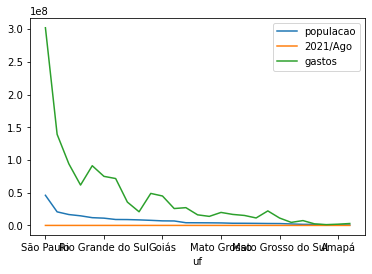

In [15]:
ultima_coluna = gastos_e_populacao.columns[-1]
gastos_e_populacao["gastos"] = gastos_e_populacao[ultima_coluna] * 1_000_000
gastos_e_populacao.plot()

In [16]:
gastos_e_populacao.loc[['Ceará', 'Pará']]

,populacao,2021/Ago,gastos
uf,,,
Ceará,8936431,35.65,35650000.0
Pará,8442962,20.84,20840000.0


In [17]:
gastos_e_populacao['gasto_por_habitante'] = gastos_e_populacao['gastos'] / gastos_e_populacao['populacao']
gastos_e_populacao.head()

,populacao,2021/Ago,gastos,gasto_por_habitante
uf,,,,
São Paulo,46024937,301.99,301990000.0,6.561443
Minas Gerais,20732660,139.16,139160000.0,6.712115
Rio de Janeiro,16615526,94.14,94140000.0,5.665785
Bahia,14659023,61.65,61650000.0,4.205601
Paraná,11835379,91.19,91190000.0,7.704865


<AxesSubplot:xlabel='uf'>

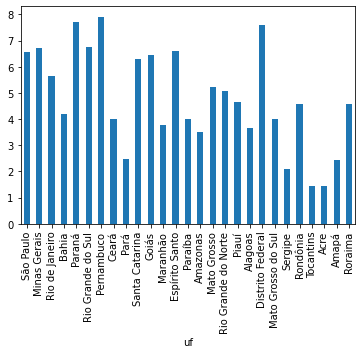

In [18]:
gastos_e_populacao['gasto_por_habitante'].plot(kind='bar')

#### !Challenge:
- review chart above and format as best practices (legend, titles, sorting descending gasto_por_habitante)
- put a average line to identify which status are above and below the average
- sort by populacao

<AxesSubplot:xlabel='populacao', ylabel='gastos'>

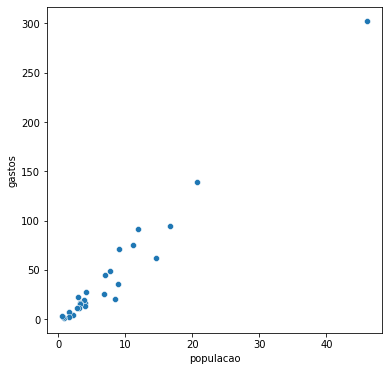

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = gastos_e_populacao / 1_000_000, x='populacao', y='gastos')

<AxesSubplot:xlabel='populacao', ylabel='gasto_por_habitante'>

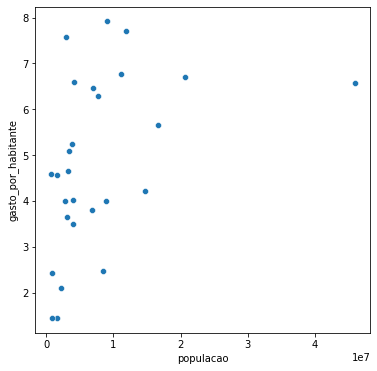

In [29]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = gastos_e_populacao, x='populacao', y='gasto_por_habitante')

#### !Challenge:
- Review titles with "_" and put a better title
- Make the same chart but now for the penultimate month
- Try yo make the same chart but for the last two months, comparing them by colors

### SECOND VIDEO

Getting data from last class

In [60]:
ordenados_por_total = pd.read_csv('../data/02-pos-data-analytics-visualizacao-de-dados/ordenados_por_total.csv',
                                 delimiter=';').sort_values(by='Total', ascending=False)

# 01 UPDATE INDEX
ordenados_por_total = ordenados_por_total.set_index('Unidade da Federação')

# 02 FILTERING COLUMNS
columns_filter = ordenados_por_total.columns[6:].tolist()
ordenados_por_total = ordenados_por_total[columns_filter]

# 03 DIVIDE BY MILLION TO FACILITATE DATA VISUALIZATION
ordenados_por_total = ordenados_por_total / 1_000_000

In [61]:
ordenados_por_total

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,173.06,170.62,170.39,172.51,175.56,179.61,180.10,180.21,192.00,191.26,...,338.63,361.43,352.85,502.91,504.43,548.11,503.16,404.37,301.99,44290.79
31 Minas Gerais,70.30,79.12,79.05,79.27,79.63,82.22,80.37,82.42,88.61,84.49,...,181.83,192.84,183.89,261.38,255.55,275.15,249.71,194.73,139.16,21899.55
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,129.21,130.53,134.08,172.64,174.04,191.86,163.58,119.41,91.19,15672.16
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,120.29,115.99,126.73,169.69,145.30,155.08,142.81,112.81,74.95,13613.34
33 Rio de Janeiro,44.13,42.91,45.32,43.95,44.12,44.36,42.50,43.07,44.55,41.35,...,96.75,103.47,87.52,125.74,132.97,145.37,124.91,113.66,94.14,11131.87
29 Bahia,33.41,41.33,42.83,42.10,39.91,57.66,43.25,42.85,43.33,40.95,...,87.65,88.21,96.88,117.82,115.93,134.23,120.52,95.69,61.65,10498.50
26 Pernambuco,26.22,30.72,30.59,31.42,28.95,30.99,31.71,30.70,31.17,30.89,...,79.48,83.14,81.74,105.87,118.22,132.10,119.55,89.16,71.63,9243.66
42 Santa Catarina,24.41,27.48,27.81,28.35,28.99,30.05,28.89,30.73,31.27,30.00,...,79.27,75.24,82.03,92.58,89.98,101.66,93.06,70.53,48.88,8392.94
23 Ceará,27.64,30.09,31.38,31.19,29.46,30.30,29.30,30.44,31.74,30.42,...,55.33,57.45,60.11,96.06,100.54,102.83,81.92,57.73,35.65,7118.54
